<a href="https://colab.research.google.com/github/AndBalbino/Fase2_AulasFiap-ML/blob/main/Fase2_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries temporais - Time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [3]:
df = pd.read_csv(df_path)  # df = pd.read_csv(df_path, parse_dates=[0], index_col='DATE') Opção para o DateTime

In [4]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

In [6]:
df.head()

,DATE,Value
DATE,,
1985-01-01,01-01-1985,72.5052
1985-02-01,02-01-1985,70.6720
1985-03-01,03-01-1985,62.4502
1985-04-01,04-01-1985,57.4714
1985-05-01,05-01-1985,55.3151


In [7]:
df.drop("DATE", axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [9]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Por que devo fazer essa transformação?

- Ao trabalhar com data em series temporais, alterar o index para que ele seja a data facilita em uma busca ao invés de usar o index tradicional.
- O indice vai retornar o valor da coluna para aquele index, sendo assim fica mais fácil uma busca. Ou seja, nesse caso eu só tenho uma coluna, e a data virou indice no dataframe.

Por exemplo:

In [10]:
df.loc['1985-05-01'] # Loc - Location, localização

,1985-05-01
Value,55.3151


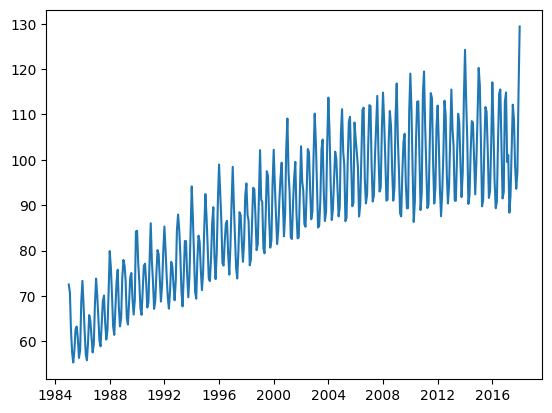

In [11]:
plt.plot(df.index, df.Value)

### Deconpondo a serie temporal


In [12]:
# Deconpondo a serie temporal
resultados = seasonal_decompose(df)

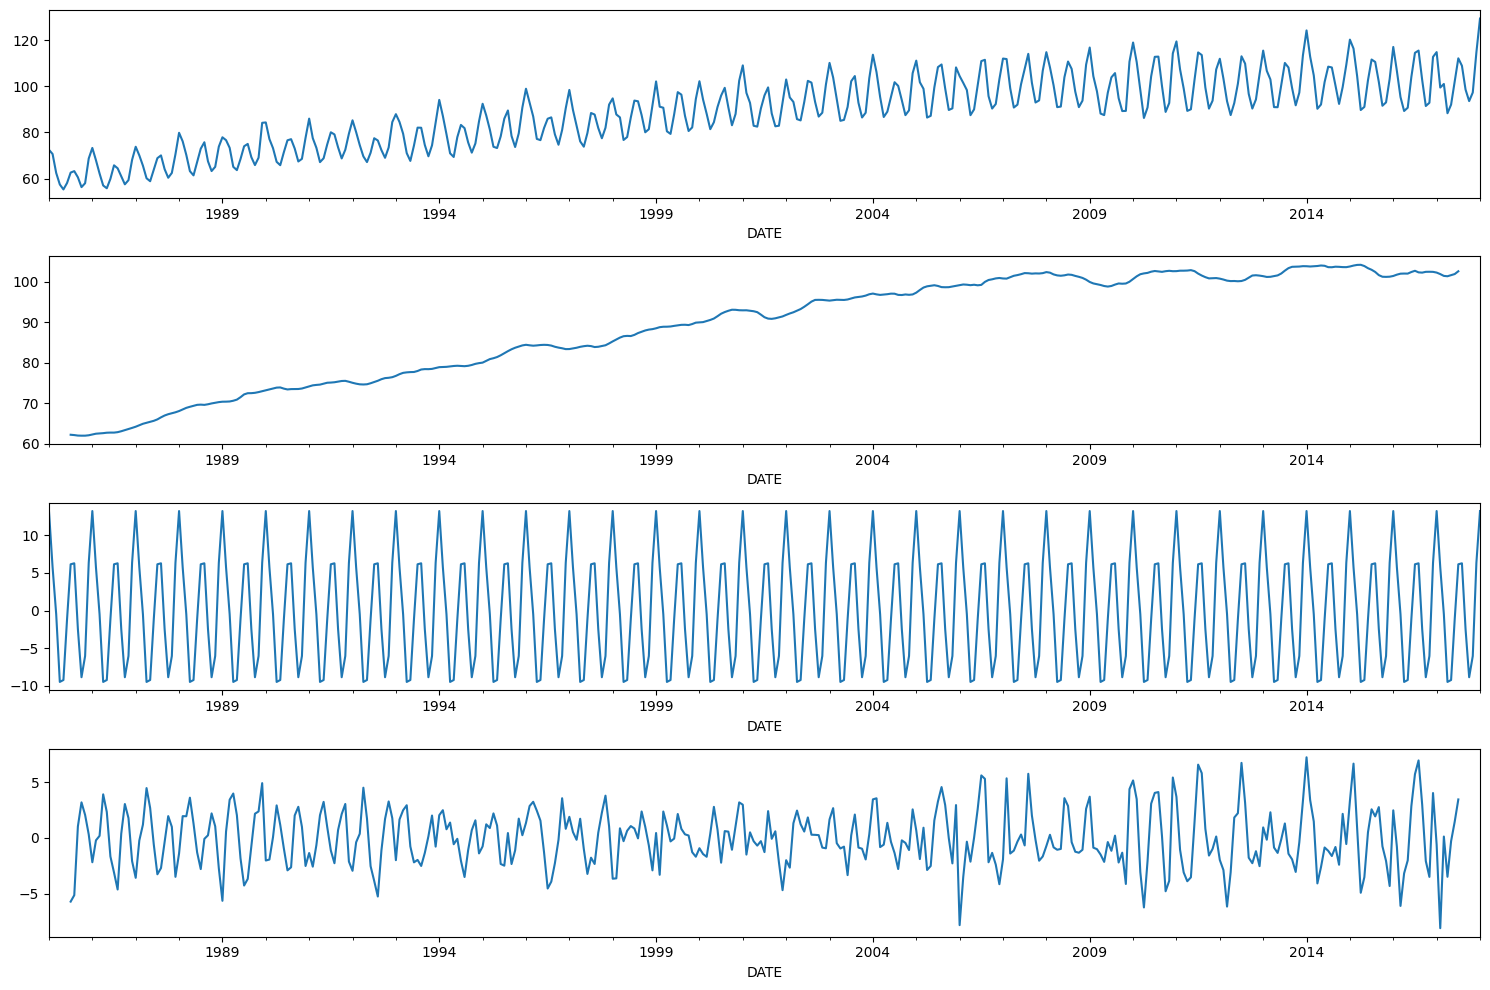

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))

resultados.observed.plot(ax=ax1) # Observado
resultados.trend.plot(ax=ax2) # Tendência
resultados.seasonal.plot(ax=ax3) # Sazonalidade
resultados.resid.plot(ax=ax4) # Residuo

plt.tight_layout()


In [14]:
# Estacionária ou não estacionária

# ADF - Audmented Dickey Fuller

# H0 - Hipótese Nula (Não é estacionária)
# H1 - Hipótese Alternativa (É estacionária)

# p-value = 0.05 (5%), rejeita a hipótese nula H, com um nível de confiança de 95%

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
sns.set_style('darkgrid')

In [17]:
X = df.Value.values

In [18]:
result = adfuller(X)

print('Teste ADF')
print(f'Teste estatístico: {result[0]} - (Maior do que os valores críticos de baixo para cima)')
print(f'p-value: {result[1]}')
print('Valores críticos')
for key, value in result[4].items():
  print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -2.256990350047235 - (Maior do que os valores críticos de baixo para cima)
p-value: 0.1862146911658712
Valores críticos
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


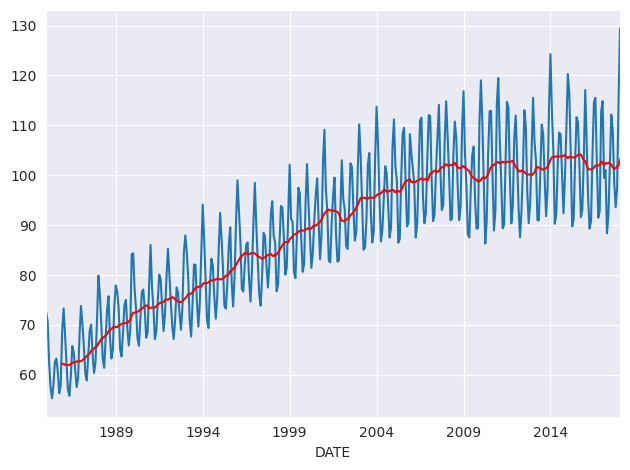

In [19]:
ma = df.rolling(12).mean()

f,ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

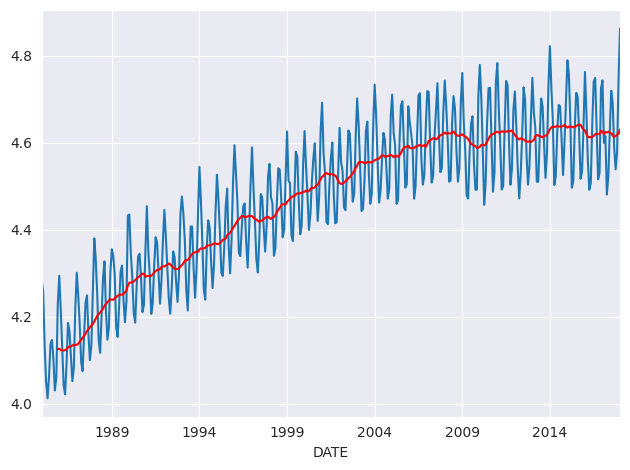

In [20]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()


f,ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

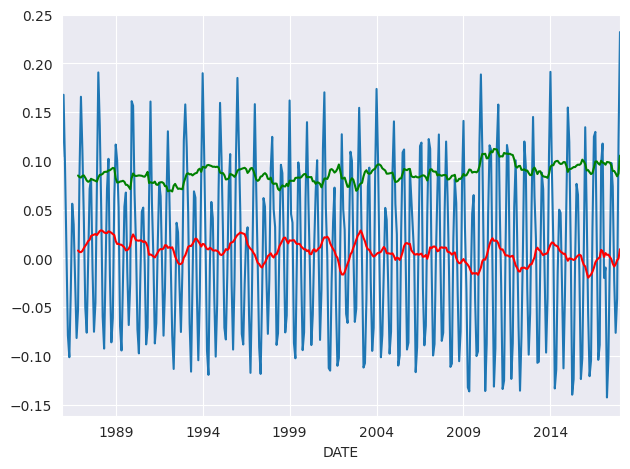

In [21]:
df_sub = (df_log - ma_log).dropna()

ma_sub = df_sub.rolling(12).mean()

std = df_sub.rolling(12).std()

f,ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [22]:
X_sub = df_sub.Value.values
result_sub = adfuller(X_sub)

print('Teste ADF')
print(f'Teste estatístico: {result_sub[0]} - (Menor do que os valores críticos de baixo para cima)')
print(f'p-value: {result_sub[1]}')
print('Valores críticos')
for key, value in result_sub[4].items():
  print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -5.2115861853654355 - (Menor do que os valores críticos de baixo para cima)
p-value: 8.32563975994627e-06
Valores críticos
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


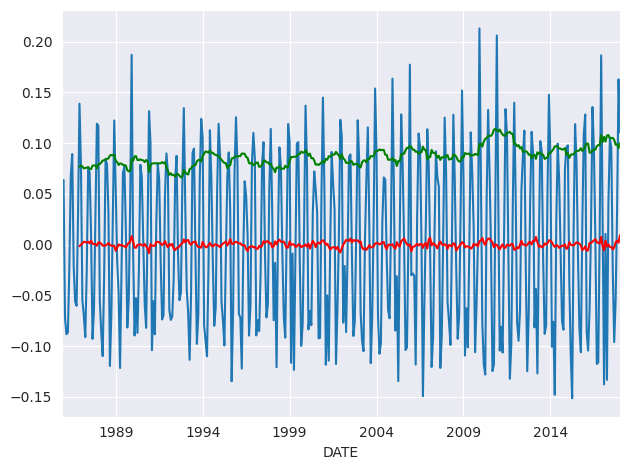

In [23]:
df_diff = df_sub.diff(1)

ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

f,ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()




In [24]:
X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste estatístico: {result_diff[0]} - (Menor do que os valores críticos de baixo para cima)')
print(f'p-value: {result_diff[1]}')
print('Valores críticos')
for key, value in result_diff[4].items():
  print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -7.651129568145172 - (Menor do que os valores críticos de baixo para cima)
p-value: 1.788126735435739e-11
Valores críticos
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


### Autocorrelação e Autocorrelação parcial

In [25]:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf =pacf(df_diff.dropna(), nlags=25)

In [27]:
#5% ACF

# 1.96/sqrt(N-d) -> N - Número de pontos de df e D - é o número de vezes que nós dividimos

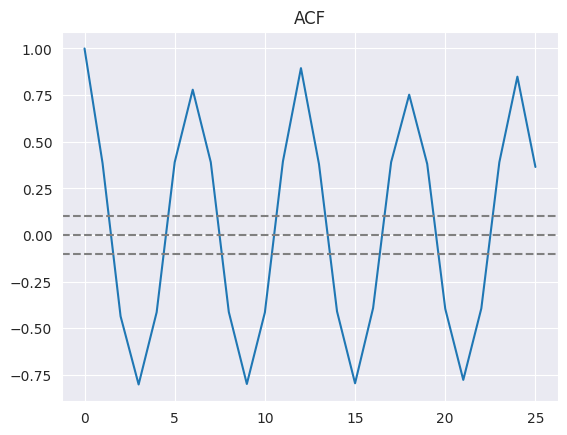

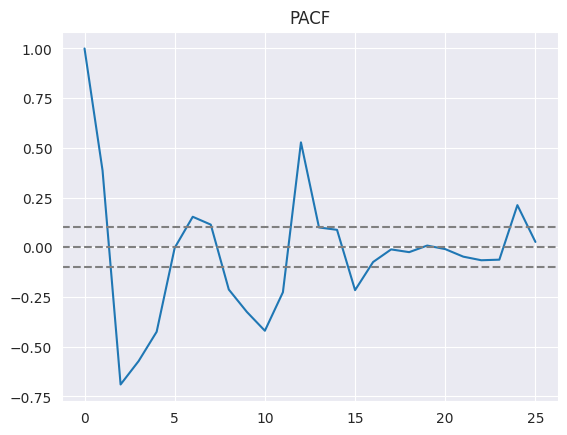

In [28]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray')

plt.title('ACF')
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray')

plt.title('PACF')
plt.show()


In [29]:
#A(x,y,z)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

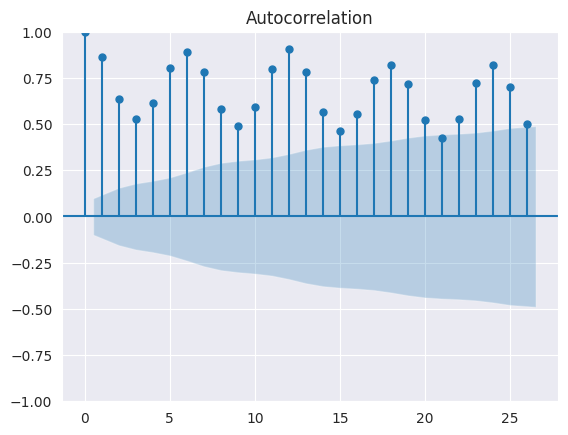

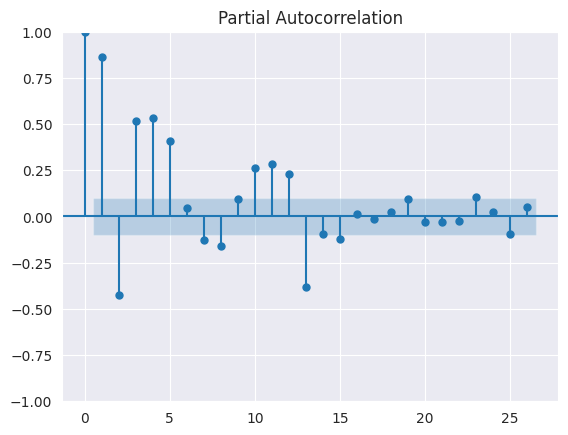

In [31]:
plot_acf(df.Value)
plot_pacf(df.Value)

plt.show()